In [1]:
import joblib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
results = joblib.load('/home/charles/mva/waltz_robot/src/valse_constantin.pt')
print(results.keys())
print(results['pred_uvd'].shape)
print(results['pred_phi'][200][10])
test = results['pred_phi'][0][0]
print(test[0]**2 + test[1]**2)

dict_keys(['pred_uvd', 'pred_xyz_29', 'pred_scores', 'pred_sigma', 'f', 'pred_betas', 'pred_phi', 'scale_mult', 'pred_cam_root', 'bbox', 'height', 'width', 'img_path', 'img_sizes'])
(413, 29, 3)
[ 0.95865446 -0.29947254]
1.0022094570869333


(413, 3)


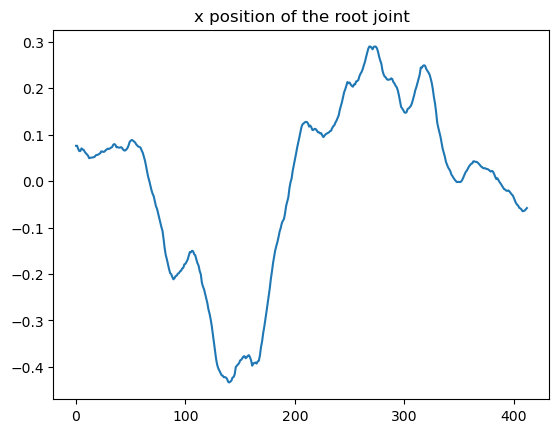

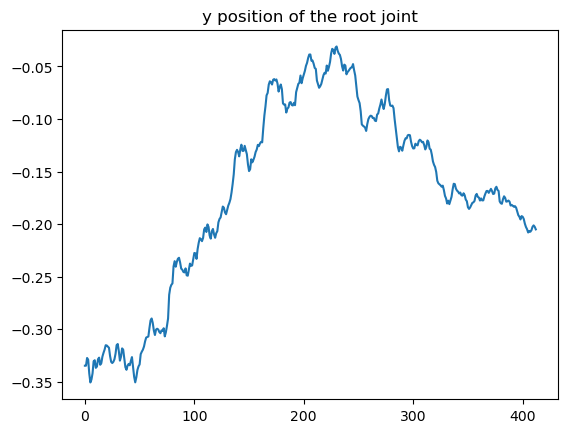

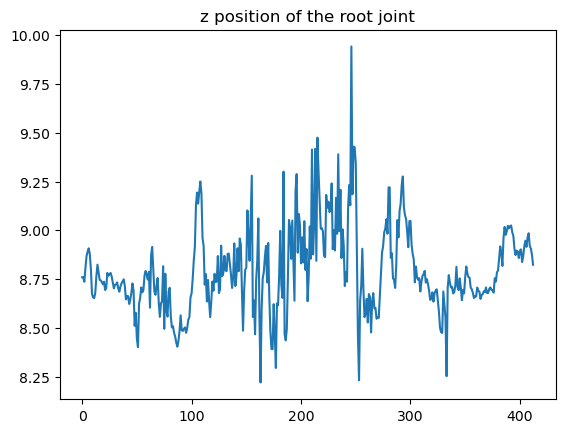

In [3]:
print(results['pred_cam_root'].shape)

plt.plot(results['pred_cam_root'][:,0])
plt.title('x position of the root joint')
plt.show()
plt.plot(results['pred_cam_root'][:,1])
plt.title('y position of the root joint')
plt.show()
plt.plot(results['pred_cam_root'][:,2])
plt.title('z position of the root joint')
plt.show()

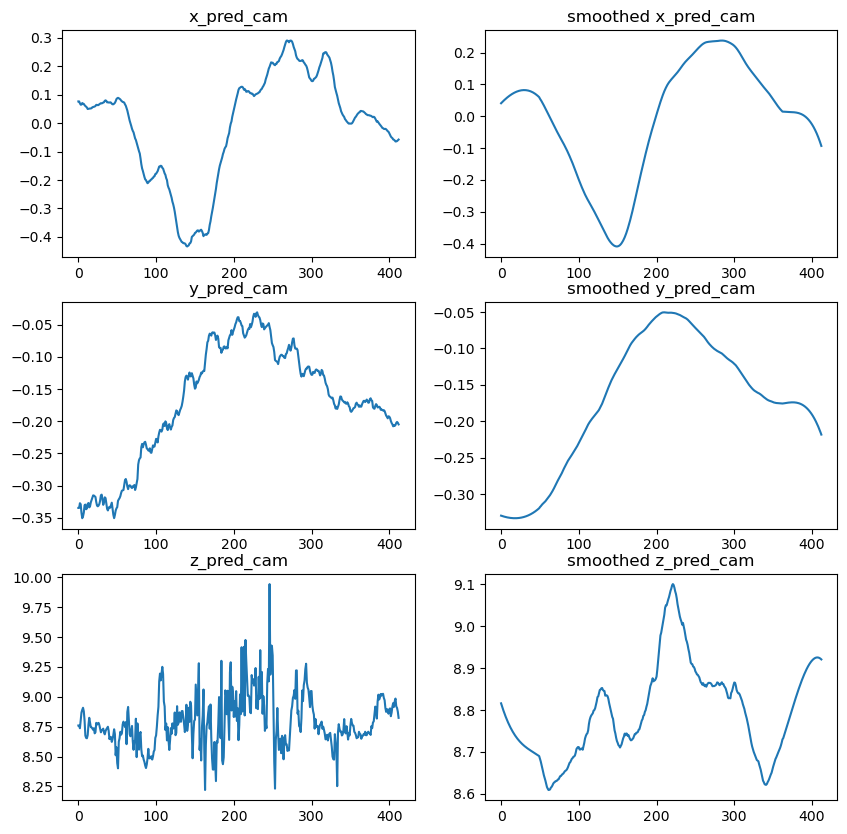

In [4]:
x_pred_cam = results['pred_cam_root'][:,0]
y_pred_cam = results['pred_cam_root'][:,1]
z_pred_cam = results['pred_cam_root'][:,2]

from scipy.signal import savgol_filter
# Interpolate the z values to reduce the noise
x_pred_cam_f = savgol_filter(x_pred_cam, 100, 3)
y_pred_cam_f = savgol_filter(y_pred_cam, 100, 3)
z_pred_cam_f = savgol_filter(z_pred_cam, 100, 3)

fig, ax = plt.subplots(3, 2, figsize=(10, 10))
ax[0, 0].plot(x_pred_cam)
ax[0, 0].set_title('x_pred_cam')
ax[0, 1].plot(x_pred_cam_f)
ax[0, 1].set_title('smoothed x_pred_cam')
ax[1, 0].plot(y_pred_cam)
ax[1, 0].set_title('y_pred_cam')
ax[1, 1].plot(y_pred_cam_f)
ax[1, 1].set_title('smoothed y_pred_cam')
ax[2, 0].plot(z_pred_cam)
ax[2, 0].set_title('z_pred_cam')
ax[2, 1].plot(z_pred_cam_f)
ax[2, 1].set_title('smoothed z_pred_cam')
plt.show()

In [5]:
print(results['pred_cam_root'][200])
print(results['pred_uvd'][200][10])
print(results['pred_xyz_29'][200][10])

[ 0.04546271 -0.05773912  8.830576  ]
[0.07822096 0.4012789  0.01854897]
[0.04204269 0.44085833 0.01855588]


In [6]:
all_angles = results['pred_phi']
joint_variation = np.zeros(23)
for joint in range(23):
    joint_variation[joint] = np.var(all_angles[:,joint])
print(joint_variation)

[0.26560736 0.24014042 0.25120777 0.24812719 0.25745201 0.24514006
 0.33987594 0.16126111 0.24427974 0.12459825 0.3769733  0.25736228
 0.30217522 0.20160215 0.24029973 0.17985074 0.30445659 0.32373512
 0.20336813 0.35049334 0.18111256 0.28785327 0.2070076 ]


/tmp/ipykernel_23857/586244896.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(joints[j, 0], joints[j, 1], joints[j, 2], c=colors[j], label=f'Joint {j}')


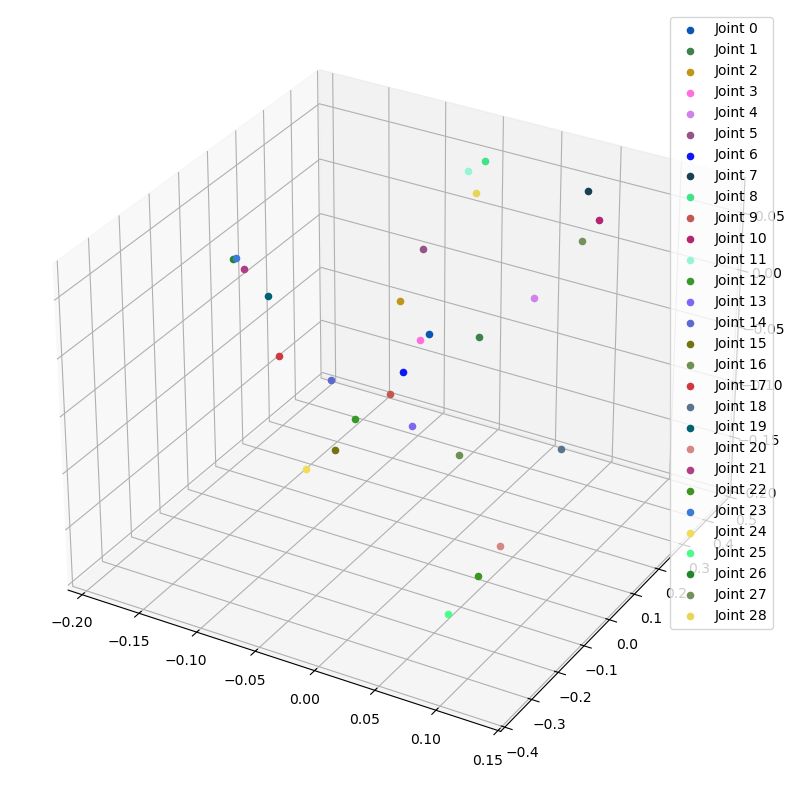

In [7]:
joints_positions = results['pred_xyz_29']

# Joint positions are in the form (N, 29, 3) where N is the number of frames
# and 29 is the number of joints. The 3 is the x, y, z coordinates of the joints.

colors = np.zeros((29, 3))
lin = np.linspace(0, 1, 29)
for j in range(29):
    colors[j] = np.random.rand(3)
    # colors[j] = [lin[j], 0, 1 - lin[j]]

frame = 0

# plot in 3D the positions of the joints of interest
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
joints = joints_positions[frame]
joints = joints - joints[0]
for j in range(29):
    ax.scatter(joints[j, 0], joints[j, 1], joints[j, 2], c=colors[j], label=f'Joint {j}')
    
ax.legend()
plt.show()


With the above graph we find the joints of interest for the inverse kinematics problem :

- Pelvis : 0
- Head : 24
- Left Hand : 25
- Right Hand : 26
- Left Foot : 27
- Right Foot : 28